List of all the different CPUs which were used to run the code.

1. Intel Xeon Gold 6238 CPU @ 2.10GHz \
L1d cache: 32 KB \
L1i cache: 32 KB \
L2 cache: 1024 KB \
L3 cache: 30250 KB

2. Intel Xeon Silver 4214R CPU @ 2.40 GHz \
L1d cache: 32 KB \
L1i cache: 32 KB \
L2 cache: 1024 KB \
L3 cache: 16500 KB

3. Intel Xeon E5 2620 CPU @ 2.00 GHz \
L1d cache: 32 KB \
L1i cache: 32 KB \
L2 cache: 256 KB \
L3 cache: 15000 KB

4. Intel Xeon Gold 6145 CPU @ 2.00 GHz \
L1d cache: 32 KB \
L1i cache: 32 KB \
L2 cache: 1024 KB \
L3 cache: 27500 KB

5. Intel Xeon Silver 4216 CPU @ 2.10 GHz \
L1d cache: 32 KB \
L1i cache: 32 KB \
L2 cache: 1024 KB \
L3 cache: 22000 KB

6. Intel Core i5-9300H CPU @ 2.40 GHz \
L1 cache: 256 KB \
L2 cache: 1024 KB \
L3 cache: 8000 KB

7. Intel Core i5-3470 CPU @ 3.20 GHz \
L1 cache: 128 KB \
L2 cache: 1024 KB \
L3 cache: 6000 KB

8. Intel Core i5-6500 CPU @ 3.20 GHz \
L1 cache: 128 KB \
L2 cache: 1024 KB \
L3 cache: 6000 KB

9. Intel Core i5-11400 CPU @ 2.60 GHz \
L1d cache: 288 KB \
L1i cache: 192 KB \
L2 cache: 3000 KB \
L3 cache: 12000 KB

## Preprocessing the data

The `iterationtime.txt` file is processed to extract the time taken by the code for a particular value of `slambx` and `slamby`. These are stored in the form of a csv document.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Initialize an empty list to store the 3rd numbers
third_numbers = []

# Open the file and read line by line
with open('/content/drive/MyDrive/BMP/runtimes/105_iterationtime.txt', 'r') as file:
    for i, line in enumerate(file, start=1):
        # Check if line number is a multiple of 11
        if i % 11 == 0:
            # Split the line into numbers and get the 3rd number
            numbers = line.split()
            third_number = float(numbers[2])
            # Append the 3rd number to the list
            third_numbers.append(third_number)

# Convert the list into a pandas DataFrame
df = pd.DataFrame(third_numbers, columns=['Third Number'])

# Print the DataFrame
print(df)

#calculating adjacent difference, for absolute runtime of one iteration
temp = df['Third Number'][0]
df_diff = df.diff()
df_diff['Third Number'][0] = temp
print(df_diff)

    Third Number
0     206.782678
1     432.634008
2     678.799348
3     945.207390
4    1231.828574
..           ...
95  40384.336694
96  41008.005607
97  41670.020820
98  42370.470028
99  43109.346842

[100 rows x 1 columns]
    Third Number
0     206.782678
1     225.851330
2     246.165340
3     266.408042
4     286.621184
..           ...
95    585.106871
96    623.668913
97    662.015213
98    700.449208
99    738.876814

[100 rows x 1 columns]


In [ ]:
# Initialize an empty list to store the values
values = []

# Iterate over i and j
for i in range(10, 20):
    for j in range(10, 20):
        # Append the values to the list
        values.append([i / 10, j / 10])

# Convert the list into a pandas DataFrame
temp_df = pd.DataFrame(values, columns=['i', 'j'])

# Print the DataFrame
print(temp_df)


      i    j
0   1.0  1.0
1   1.0  1.1
2   1.0  1.2
3   1.0  1.3
4   1.0  1.4
..  ...  ...
95  1.9  1.5
96  1.9  1.6
97  1.9  1.7
98  1.9  1.8
99  1.9  1.9

[100 rows x 2 columns]


In [ ]:
final_df = pd.concat([temp_df, df_diff], axis=1)
final_df = final_df.rename(columns={'i': 'slambx', 'j': 'slamby', 'Third Number': 'time_taken'})
print(final_df)

    slambx  slamby  time_taken
0      1.0     1.0  206.782678
1      1.0     1.1  225.851330
2      1.0     1.2  246.165340
3      1.0     1.3  266.408042
4      1.0     1.4  286.621184
..     ...     ...         ...
95     1.9     1.5  585.106871
96     1.9     1.6  623.668913
97     1.9     1.7  662.015213
98     1.9     1.8  700.449208
99     1.9     1.9  738.876814

[100 rows x 3 columns]


In [ ]:
final_df.to_csv('/content/drive/MyDrive/BMP/csvs/file9.csv', index=False, encoding='utf-8')

## Plotting the graphs

To get a basic understanding of the relation between the parameters, 2D graphs are plotted to get a general idea.

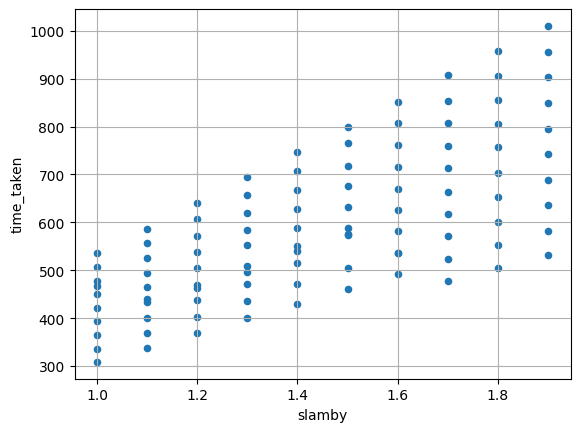

In [ ]:
import matplotlib.pyplot as plt

final_df.plot(x='slamby', y='time_taken', kind='scatter')

# Show the plot
# plt.minorticks_on()
plt.grid(which = 'both')
plt.show()

In [ ]:
plt.figure()

final_df.plot(x='time_taken', y='slambx', kind='scatter')
final_df.plot(x='time_taken', y='slamby', kind='scatter')

# Show the plot
# plt.minorticks_on()
plt.grid(which = 'both')
plt.show()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(final_df['slambx'], final_df['slamby'], final_df['time_taken'])

# Set the labels
ax.set_xlabel('slambx')
ax.set_ylabel('slamby')
ax.set_zlabel('time_taken')

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

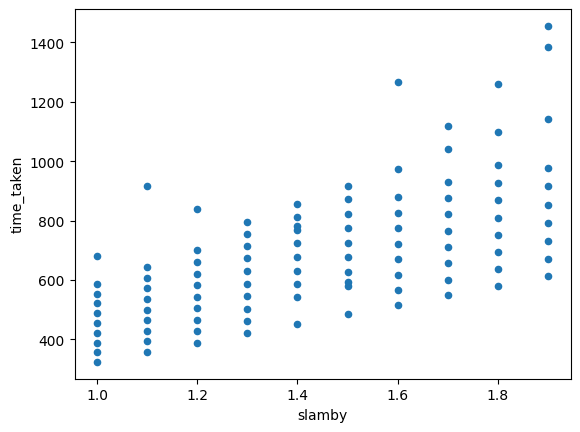

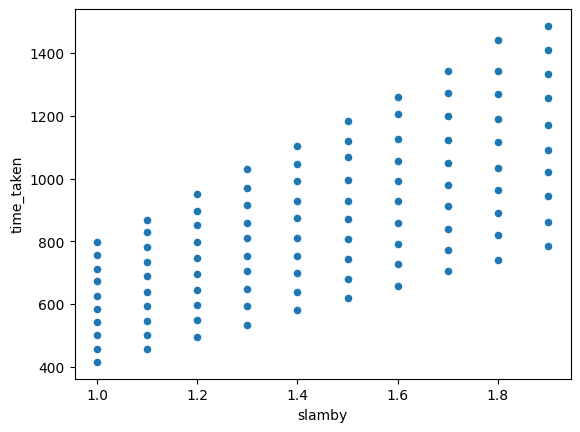

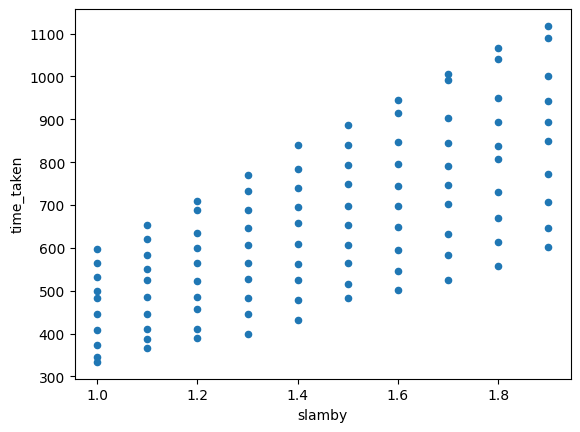

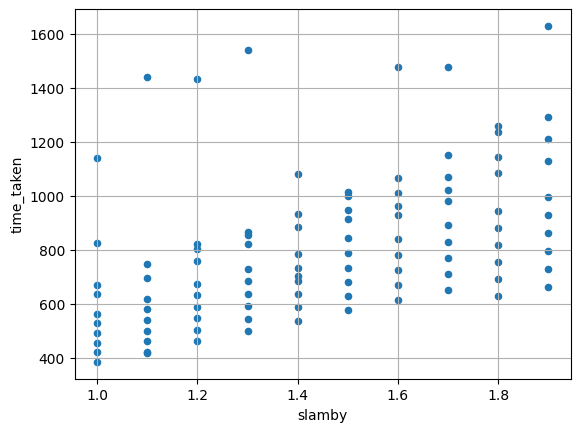

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file3.csv')
df3 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file4.csv')
df4 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file5.csv')

plt.figure()

df1.plot(x='slamby', y='time_taken', kind='scatter')
df2.plot(x='slamby', y='time_taken', kind='scatter')
df3.plot(x='slamby', y='time_taken', kind='scatter')
df4.plot(x='slamby', y='time_taken', kind='scatter')

# Show the plot
# plt.minorticks_on()
plt.grid(which = 'both')
plt.show()